In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Kalman import KalmanFilter, signal

In [2]:
time = np.linspace(0, 10, 1000)
mainSignal = signal(np.cos(np.linspace(0, 10, 1000)), np.random.normal(0, .5, 1000))
derivSignal = signal(np.sin(np.linspace(0, 10, 1000)), np.random.normal(0, .5, 1000))
predicted = {"main":[], "deriv":[]}

kf = KalmanFilter(
    x_init = np.array([[0],[0]]),#Etat estime
    P_init = np.array([0, 0]),#Covariance estimee
    F = np.array([[1,1000/10],[0,1]]),#matrice de passage de l'etat i a i+1
    Q = np.array([[.0001,.01],[.01,.0001]]),#covariance vaximale souhaitee
    R = np.array([[10000,0],[0, 10000]]),#Covariance du bruit
    H = np.eye(2),
)

In [3]:
for i in range(1000):
    X = np.array([[mainSignal.noisy[i]], [derivSignal.noisy[i]]])
    kf.predict()
    kf.update(X)
    predicted["main"].append(kf.x[0, 0])
    predicted["deriv"].append(kf.x[1, 0])

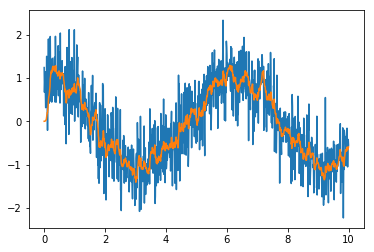

In [4]:
plt.plot(time, mainSignal.noisy)
plt.plot(time, predicted["main"])
plt.show()